In [ ]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.preprocessing import scale

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cardekho_1.csv to cardekho_1.csv


In [ ]:
df=pd.read_csv('cardekho_1.csv',na_values='?').dropna()
df.info()
df1=df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.isna().sum() #Checking for NA Values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['Fuel_Type','Seller_Type','Transmission','Owner'])#Onehotencoding done for qualitative variables


In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Owner_0,Owner_1,Owner_3
0,ritz,2014,3.35,5.59,27000,0,0,1,1,0,0,1,1,0,0
1,sx4,2013,4.75,9.54,43000,0,1,0,1,0,0,1,1,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,1,1,0,0,1,1,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,1,1,0,0,1,1,0,0
4,swift,2014,4.60,6.87,42450,0,1,0,1,0,0,1,1,0,0


In [ ]:
max_val=df['Year'].max() #gives the maximum value in the years column.
Age=df['Year'].apply(lambda x:(max_val+1)-x) #Creating a new column called Age(of car).

df.insert(0,'Age',Age)
df.head()

,Age,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Owner_0,Owner_1,Owner_3
0,5,ritz,2014,3.35,5.59,27000,0,0,1,1,0,0,1,1,0,0
1,6,sx4,2013,4.75,9.54,43000,0,1,0,1,0,0,1,1,0,0
2,2,ciaz,2017,7.25,9.85,6900,0,0,1,1,0,0,1,1,0,0
3,8,wagon r,2011,2.85,4.15,5200,0,0,1,1,0,0,1,1,0,0
4,5,swift,2014,4.60,6.87,42450,0,1,0,1,0,0,1,1,0,0


In [ ]:
df.drop('Car_Name',axis=1,inplace=True) #dropping irrelevant columns
df.drop('Year',axis=1,inplace=True)

In [ ]:
df.info() #Checking if all the columns are in the correct data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     301 non-null    int64  
 1   Selling_Price           301 non-null    float64
 2   Present_Price           301 non-null    float64
 3   Kms_Driven              301 non-null    int64  
 4   Fuel_Type_CNG           301 non-null    uint8  
 5   Fuel_Type_Diesel        301 non-null    uint8  
 6   Fuel_Type_Petrol        301 non-null    uint8  
 7   Seller_Type_Dealer      301 non-null    uint8  
 8   Seller_Type_Individual  301 non-null    uint8  
 9   Transmission_Automatic  301 non-null    uint8  
 10  Transmission_Manual     301 non-null    uint8  
 11  Owner_0                 301 non-null    uint8  
 12  Owner_1                 301 non-null    uint8  
 13  Owner_3                 301 non-null    uint8  
dtypes: float64(2), int64(2), uint8(10)
memory 

In [ ]:
#Performing regression on all the variables.
fit=smf.ols('Selling_Price~Age+Present_Price+Kms_Driven+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol+Seller_Type_Dealer+Seller_Type_Individual+Transmission_Automatic+Transmission_Manual+Owner_0+Owner_1+Owner_3',data=df).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     251.3
Date:                Sat, 29 Apr 2023   Prob (F-statistic):          1.32e-131
Time:                        10:38:45   Log-Likelihood:                -589.16
No. Observations:                 301   AIC:                             1198.
Df Residuals:                     291   BIC:                             1235.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.8615      0.310      2.780      0.006       0.252       1.471
Age                       -0.3973      0.042     -9.374      0.000      -0.481      -0.314
Present_Price              0.4426      0.016     27.873      0.000       0.411       0.474
Kms_Driven             -6.023e-06    3.2e-06     -1.879      0.061   -1.23e-05    2.85e-07
Fuel_Type_CNG             -0.6908      0.884     -0.782      0.435      -2.430       1.048
Fuel_Type_Diesel           1.6797      0.420      4.001      0.000       0.854       2.506
Fuel_Type_Petrol          -0.1274      0.387     -0.329      0.742      -0.889       0.634
Seller_Type_Dealer         0.9702      0.209      4.650      0.000       0.560       1.381
Seller_Type_Individual    -0.1087      0.191     -0.568      0.571      -0.485       0.268
Transmission_Automatic     1.1974      0.240      4.999      0.000       0.726       1.669
Transmission_Manual       -0.3359      0.208     -1.612      0.108      -0.746       0.074
Owner_0                    2.0971      0.557      3.764      0.000       1.001       3.194
Owner_1                    2.5697      0.662      3.884      0.000       1.268       3.872
Owner_3                   -3.8053      1.296     -2.936      0.004      -6.356      -1.254
==============================================================================
Omnibus:                       93.014   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              768.207
Skew:                           1.004   Prob(JB):                    1.53e-167
Kurtosis:                      10.565   Cond. No.                     2.22e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.76e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#Using the previous regression model to remove insignificant variables(Pval>0.05)
fit=smf.ols('Selling_Price~Age+Present_Price+Fuel_Type_Diesel+Seller_Type_Dealer+Transmission_Automatic+Owner_0+Owner_1+Owner_3',data=df).fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     320.6
Date:                Sat, 29 Apr 2023   Prob (F-statistic):          2.65e-133
Time:                        10:38:46   Log-Likelihood:                -591.09
No. Observations:                 301   AIC:                             1198.
Df Residuals:                     293   BIC:                             1228.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.4318      0.524      0.825      0.410      -0.599       1.462
Age                       -0.4407      0.036    -12.334      0.000      -0.511      -0.370
Present_Price              0.4421      0.016     27.773      0.000       0.411       0.473
Fuel_Type_Diesel           1.7154      0.291      5.887      0.000       1.142       2.289
Seller_Type_Dealer         1.0480      0.253      4.138      0.000       0.550       1.546
Transmission_Automatic     1.4526      0.323      4.502      0.000       0.818       2.088
Owner_0                    2.0124      0.479      4.199      0.000       1.069       2.956
Owner_1                    2.5664      0.615      4.175      0.000       1.357       3.776
Owner_3                   -4.1470      1.370     -3.027      0.003      -6.843      -1.451
==============================================================================
Omnibus:                       97.090   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              818.740
Skew:                           1.055   Prob(JB):                    1.63e-178
Kurtosis:                      10.799   Cond. No.                     8.33e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.52e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#Dropping all the qualitative factor Variables
df2=pd.DataFrame(df)
df2=df2.drop(['Selling_Price','Fuel_Type_Petrol','Fuel_Type_Diesel','Fuel_Type_CNG','Seller_Type_Dealer','Seller_Type_Individual','Transmission_Automatic','Transmission_Manual','Owner_0','Owner_1','Owner_3',],axis=1)
x=add_constant(df2)
x.head()

,const,Age,Present_Price,Kms_Driven
0,1.0,5,5.59,27000
1,1.0,6,9.54,43000
2,1.0,2,9.85,6900
3,1.0,8,4.15,5200
4,1.0,5,6.87,42450


In [ ]:
#Performing VIF to find correlation between variables
vif_df=pd.DataFrame()
vif_df['feature']=x.columns
vif_df["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_df)

         feature       VIF
0          const  5.137286
1            Age  1.386175
2  Present_Price  1.048553
3     Kms_Driven  1.442876


In [ ]:
#Any VIF val above 5 makes dropping that column necessary.
#Performing Regression one more time with Age,Present_Price and Kms_Driven as three factor variables against Selling_Price, the target variable.
fit=smf.ols('Selling_Price~I(Age**2)*Present_Price+Age*Present_Price',data=df).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1969.
Date:                Sat, 29 Apr 2023   Prob (F-statistic):          3.30e-224
Time:                        10:38:46   Log-Likelihood:                -383.61
No. Observations:                 301   AIC:                             779.2
Df Residuals:                     295   BIC:                             801.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0369      0.282     -0.131      0.896      -0.592       0.518
I(Age ** 2)                  -0.0040      0.007     -0.607      0.544      -0.017       0.009
Present_Price                 1.1176      0.027     41.395      0.000       1.064       1.171
I(Age ** 2):Present_Price     0.0042      0.001      6.355      0.000       0.003       0.005
Age                           0.0529      0.092      0.576      0.565      -0.128       0.234
Age:Present_Price            -0.1234      0.009    -13.956      0.000      -0.141      -0.106
==============================================================================
Omnibus:                       32.270   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.489
Skew:                          -0.307   Prob(JB):                     1.26e-28
Kurtosis:                       6.141   Cond. No.                     4.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#This model gets us an R-Sqaured Value of 0.971, an accuracy of 97.1% using only two variables.

In [ ]:
df[['Age','Present_Price','Kms_Driven']]=scale(df[['Age','Present_Price','Kms_Driven']],with_mean=True,with_std=True)#Scaling

In [ ]:
df['Age_sq']=df['Age']**2#Adding new columns to the df, because of sqauring Age.
df['Interaction']=df['Age_sq']*df['Present_Price']#Adding new columns to the df, because of Interaction effect.
df['Interaction1']=df['Age']*df['Present_Price']

x=pd.DataFrame()

In [ ]:
df

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Owner_0,Owner_1,Owner_3,Age_sq,Interaction,Interaction1
0,-0.128897,3.35,-0.236215,-0.256224,0,0,1,1,0,0,1,1,0,0,0.016614,-0.003925,0.030447
1,0.217514,4.75,0.221505,0.155911,0,1,0,1,0,0,1,1,0,0,0.047312,0.010480,0.048180
2,-1.168129,7.25,0.257427,-0.773969,0,0,1,1,0,0,1,1,0,0,1.364526,0.351266,-0.300708
3,0.910335,2.85,-0.403079,-0.817758,0,0,1,1,0,0,1,1,0,0,0.828710,-0.334036,-0.366937
4,-0.128897,4.60,-0.087890,0.141743,0,1,0,1,0,0,1,1,0,0,0.016614,-0.001460,0.011329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,-0.821718,9.50,0.460214,-0.076225,0,1,0,1,0,0,1,1,0,0,0.675221,0.310746,-0.378166
297,-0.475308,4.00,-0.200292,0.593804,0,0,1,1,0,0,1,1,0,0,0.225917,-0.045250,0.095200
298,1.603156,3.35,0.390687,1.313340,0,0,1,1,0,0,1,1,0,0,2.570111,1.004109,0.626332
299,-1.168129,11.50,0.564504,-0.719876,0,1,0,1,0,0,1,1,0,0,1.364526,0.770281,-0.659414


In [ ]:
x=pd.DataFrame(df[['Age','Present_Price','Interaction','Interaction1']])
y=pd.DataFrame(df.Selling_Price)
model=lm.LinearRegression() #Performing an Instance of Linear regression.
model.fit(x,y)
print(model.coef_) #Finding out values of coef(Beta)
print(model.intercept_)#Finding out value of (Alpha)


[[-1.41567166  4.95465236  0.29226398 -1.94996529]]
[4.74789087]


In [ ]:
#Performing K fold Cross Validation and Finding out the Mean Sqaured Error.
kfold=KFold(n_splits=x.shape[0])
test=cross_val_score(model,x,y,cv=kfold,scoring='neg_mean_squared_error',n_jobs=-1)
print(np.mean(-test))

1.0413167616647356


<Axes: xlabel='Age', ylabel='Selling_Price'>

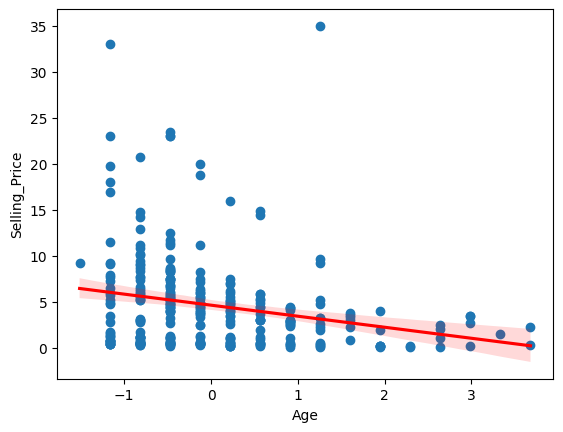

In [ ]:
#Plotting a regplot along with scatter
plt.scatter(df.Age,df.Selling_Price)
sns.regplot(x='Age', y='Selling_Price', data=df,scatter=False, color='red', order=1)

<Axes: xlabel='Age_sq', ylabel='Selling_Price'>

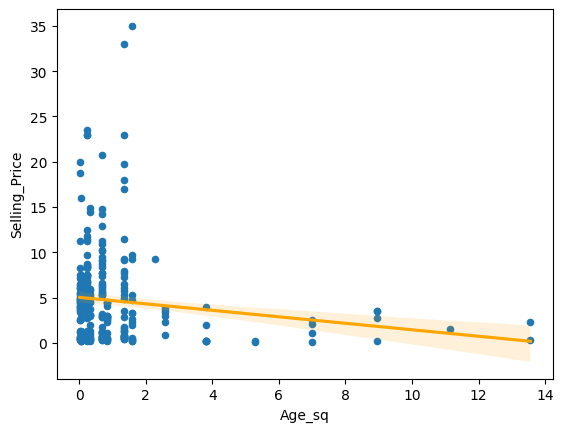

In [ ]:
df.plot(kind="scatter",x="Age_sq",y="Selling_Price")
sns.regplot(x='Age_sq', y='Selling_Price', data=df,scatter=False, color='Orange', order=1)


<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

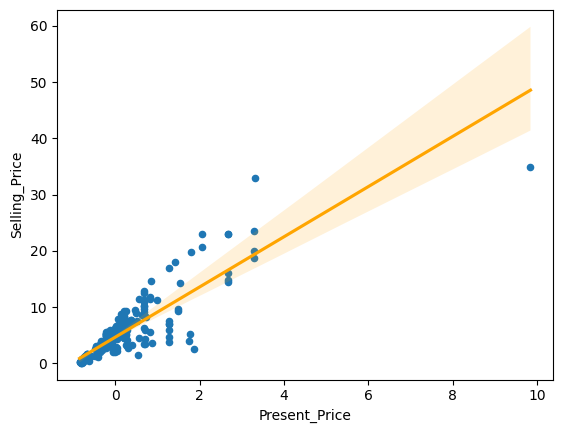

In [ ]:
df.plot(kind="scatter",x="Present_Price",y="Selling_Price")
sns.regplot(x='Present_Price', y='Selling_Price', data=df,scatter=False, color='Orange', order=1)

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

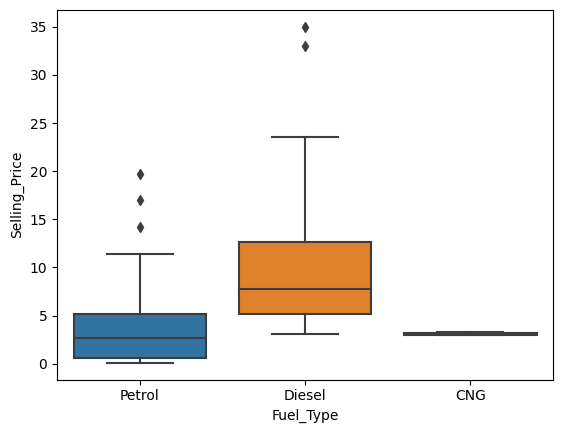

In [ ]:
sns.boxplot(data=df1,y='Selling_Price',x='Fuel_Type')

<Axes: xlabel='Seller_Type_Individual', ylabel='Selling_Price'>

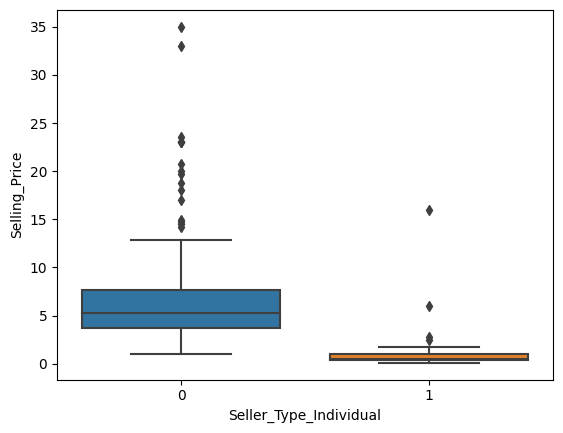

In [ ]:
sns.boxplot(data=df,y='Selling_Price',x='Seller_Type_Individual')

<Axes: >

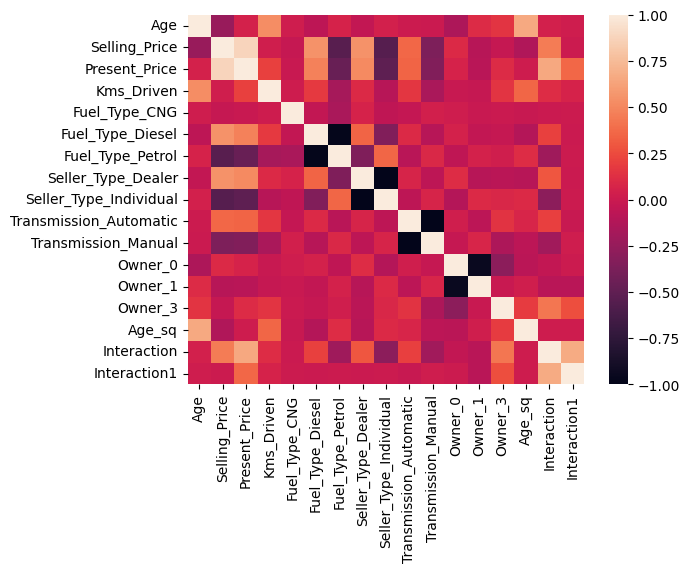

In [ ]:
sns.heatmap(df.corr(),annot=False,)